In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.pyplot as plt

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [4]:
df = pd.read_csv('../input/train.csv')


In [5]:
test_df = pd.read_csv('../input/test.csv')

In [6]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


* Our X will be all the featurs, in this case they are the pixels
* Our Y are the labels for each number
* We need to normalize X by dividing it by 255.
* Then we need to convert Y to one-hot encoded vector.
* We will cut the data into two parts, train and test


In [7]:
Y = df['label']
X = df.drop(['label'], axis = 1)

In [8]:
X = X / 255.0
X = X.values.reshape(-1,28,28,1)
Y = np.array(Y)
Y = to_categorical(Y, num_classes = 10)

In [9]:
print(X.shape)
print(Y.shape)

(42000, 28, 28, 1)
(42000, 10)


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify = Y, random_state = 31, test_size = 0.2)

In [11]:
print(type(X_train), type(X_test) , type(Y_train),type( Y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


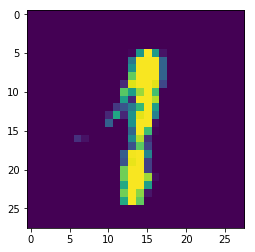

In [12]:
g = plt.imshow(X_train[0][:,:,0])

In [13]:
model = Sequential()

In [14]:
model.add(Conv2D(32,(5,5),padding = 'Same',activation ='relu', input_shape = (28,28,1)))

model.add(Conv2D(64,(3,3), padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3), padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3), padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


* We are trying to augumgent the data.
* Try zooming in and zooming out.
* We are also shifting the numbers a bit left and right by width_shift and height_shift
* Also we cannot do horizontal and vertical flip as it will convert 6 to 9 and make 4 look very odd.


In [15]:
# Maybe we can try augementing the data to improve the accuracy
datagen = ImageDataGenerator(featurewise_center=False, 
                             samplewise_center=False, 
                             featurewise_std_normalization=False, 
                             samplewise_std_normalization=False, 
                             zca_whitening=False, 
                             zca_epsilon=1e-06, 
                             rotation_range=10, 
                             width_shift_range=0.1, 
                             height_shift_range=0.1, 
                             brightness_range=None, 
                             shear_range=0.1, 
                             zoom_range=0.15, 
                             channel_shift_range=0.0, 
                             fill_mode='nearest', 
                             cval=0.0, 
                             horizontal_flip=False, 
                             vertical_flip=False, 
                             rescale=None, 
                             preprocessing_function=None, 
                             data_format=None, validation_split=0.0, dtype=None)

In [16]:
datagen.fit(X_train)

* Note that optimizer is NOT the normal Adam.
* We are using Nestrov accelerated Adam
* You can find more details here https://keras.io/optimizers/
* Also in tf https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Nadam
* It already has learning_rate decay and it is recommended not to tune its hyperparamters.
* Simple so we are ready to use it directly.

In [17]:
model.compile(optimizer = "Nadam", loss = "categorical_crossentropy", metrics = ["accuracy"])

* Please try adjusting epochs for further improvement.
* Also adding regularization may help.

In [18]:
max_epochs = 30
batch_size = 256

In [19]:
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size = batch_size) ,
                              epochs = max_epochs, verbose = 1, validation_data = (X_test, Y_test),
                              steps_per_epoch=X_train.shape[0] // batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
131/131 [==============================] - 12s 90ms/step - loss: 0.6069 - acc: 0.8023 - val_loss: 0.1105 - val_acc: 0.9655
Epoch 2/30
131/131 [==============================] - 7s 55ms/step - loss: 0.1341 - acc: 0.9593 - val_loss: 0.0507 - val_acc: 0.9837
Epoch 3/30
131/131 [==============================] - 7s 55ms/step - loss: 0.0955 - acc: 0.9705 - val_loss: 0.0376 - val_acc: 0.9881
Epoch 4/30
131/131 [==============================] - 7s 54ms/step - loss: 0.0788 - acc: 0.9758 - val_loss: 0.0370 - val_acc: 0.9880
Epoch 5/30
131/131 [==============================] - 7s 55ms/step - loss: 0.0672 - acc: 0.9795 - val_loss: 0.0380 - val_acc: 0.9894
Epoch 6/30
131/131 [==============================] - 7s 54ms/step - loss: 0.0620 - acc: 0.9811 - val_loss: 0.0244 - val_acc: 0.9920
Epoch 7/30
131/131 [==============================] - 7s 55ms/step - loss: 0.0570 - acc: 0.9824 - val_loss: 0.0273 - val_acc: 0.9919
Epoch 8/30
131/131 [

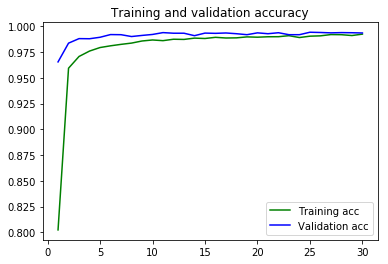

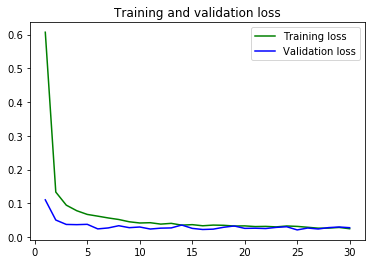

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [21]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
test_df = test_df / 255.0
test_arr = test_df.values.reshape(-1,28,28,1)

In [23]:
Y_pred_arr = model.predict(test_arr)

In [24]:
Y_pred_arr.shape

(28000, 10)

In [25]:
Y_pred_arr = np.argmax(Y_pred_arr, axis = 1)

In [26]:
results = pd.Series(Y_pred_arr,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("cnn_mnist_datagen.csv",index=False)